# The necessary libraries imports

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data

In [6]:
dataframe=pd.read_csv("C:/Users/as comp/Downloads/time_series_60min_singleindex.csv")

In [7]:
dataframe

,utc_timestamp,cet_cest_timestamp,AT_load_actual_entsoe_transparency,AT_load_forecast_entsoe_transparency,AT_price_day_ahead,AT_solar_generation_actual,AT_wind_onshore_generation_actual,BE_load_actual_entsoe_transparency,BE_load_forecast_entsoe_transparency,BE_solar_generation_actual,...,SI_load_actual_entsoe_transparency,SI_load_forecast_entsoe_transparency,SI_solar_generation_actual,SI_wind_onshore_generation_actual,SK_load_actual_entsoe_transparency,SK_load_forecast_entsoe_transparency,SK_solar_generation_actual,SK_wind_onshore_generation_actual,UA_load_actual_entsoe_transparency,UA_load_forecast_entsoe_transparency
0,2014-12-31T23:00:00Z,2015-01-01T00:00:00+0100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-01T00:00:00Z,2015-01-01T01:00:00+0100,5946.0,6701.0,35.0,NaN,69.0,9484.0,9897.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-01T01:00:00Z,2015-01-01T02:00:00+0100,5726.0,6593.0,45.0,NaN,64.0,9152.0,9521.0,NaN,...,1045.47,816.0,NaN,1.17,2728.0,2860.0,3.8,NaN,NaN,NaN
3,2015-01-01T02:00:00Z,2015-01-01T03:00:00+0100,5347.0,6482.0,41.0,NaN,65.0,8799.0,9135.0,NaN,...,1004.79,805.0,NaN,1.04,2626.0,2810.0,3.8,NaN,NaN,NaN
4,2015-01-01T03:00:00Z,2015-01-01T04:00:00+0100,5249.0,6454.0,38.0,NaN,64.0,8567.0,8909.0,NaN,...,983.79,803.0,NaN,1.61,2618.0,2780.0,3.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50396,2020-09-30T19:00:00Z,2020-09-30T21:00:00+0200,6661.0,6656.0,NaN,NaN,1847.0,9402.0,9720.0,NaN,...,1506.95,1530.0,5.32,0.44,3324.0,3170.0,1.7,1.1,NaN,NaN
50397,2020-09-30T20:00:00Z,2020-09-30T22:00:00+0200,6336.0,6310.0,NaN,NaN,1723.0,9219.0,9418.0,NaN,...,1391.15,1388.0,5.57,0.62,3099.0,3010.0,1.7,1.0,NaN,NaN
50398,2020-09-30T21:00:00Z,2020-09-30T23:00:00+0200,5932.0,5813.0,NaN,NaN,1771.0,8763.0,8873.0,NaN,...,1250.17,1274.0,5.58,0.66,2940.0,2890.0,1.6,1.0,NaN,NaN
50399,2020-09-30T22:00:00Z,2020-10-01T00:00:00+0200,5628.0,5424.0,NaN,NaN,1779.0,8131.0,8285.0,NaN,...,1206.82,1178.0,5.61,0.21,2823.0,2740.0,1.7,1.2,NaN,NaN


In [8]:





# === 2️⃣ Drop unused timestamp ===
df = dataframe.drop(columns=["cet_cest_timestamp"], errors="ignore")

# === 3️⃣ Define main feature patterns ===
features = [
    "load_actual_entsoe_transparency",
    "load_forecast_entsoe_transparency",
    "price_day_ahead",
    "solar_generation_actual",
    "wind_onshore_generation_actual"
]

# === 4️⃣ Extract country codes dynamically ===
countries = sorted(set([col.split("_")[0] for col in df.columns if "_" in col]))

# === 5️⃣ Build a new dataframe list for all countries ===
dataframes = []

for country in countries:
    cols = [f"{country}_{f}" for f in features if f"{country}_{f}" in df.columns]
    if len(cols) == 0:
        continue  # skip countries missing all features
    
    sub_df = df[["utc_timestamp"] + cols].copy()
    sub_df["country"] = country
    
    # Rename columns to match desired 5 main features
    rename_map = {f"{country}_{f}": f for f in features if f"{country}_{f}" in sub_df.columns}
    sub_df = sub_df.rename(columns=rename_map)
    
    dataframes.append(sub_df)

# === 6️⃣ Combine all countries vertically ===
final_df = pd.concat(dataframes, ignore_index=True)

# === 7️⃣ Set datetime as index (optional) ===
final_df = final_df.rename(columns={"utc_timestamp": "datetime"}).set_index("datetime")

final_df.describe()


,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual
count,1.516351e+06,1.499739e+06,32845.000000,906819.000000,1.269670e+06
mean,1.099497e+04,1.111376e+04,33.934663,626.078728,1.237101e+03
std,1.448829e+04,1.437090e+04,14.944863,2181.571078,2.801984e+03
min,6.090000e+00,1.000000e+01,-76.000000,0.000000,0.000000e+00
25%,2.327000e+03,2.460000e+03,25.000000,0.000000,4.260000e+01
50%,5.768670e+03,5.864000e+03,33.000000,5.060000,2.850000e+02
75%,1.258255e+04,1.278200e+04,42.000000,259.000000,1.238000e+03
max,2.170811e+06,9.515000e+04,187.000000,32947.000000,4.075200e+04


In [8]:
final_df.to_csv("merged_entsoe_data.csv")

In [9]:
final_df.to_csv("c:/Users/as comp/Downloads/merged_entsoe_data.csv")

In [26]:
final_df

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual,country
datetime,,,,,,
2014-12-31T23:00:00Z,NaN,NaN,NaN,NaN,NaN,AT
2015-01-01T00:00:00Z,5946.0,6701.0,35.0,NaN,69.0,AT
2015-01-01T01:00:00Z,5726.0,6593.0,45.0,NaN,64.0,AT
2015-01-01T02:00:00Z,5347.0,6482.0,41.0,NaN,65.0,AT
2015-01-01T03:00:00Z,5249.0,6454.0,38.0,NaN,64.0,AT
...,...,...,...,...,...,...
2020-09-30T19:00:00Z,NaN,NaN,NaN,NaN,NaN,UA
2020-09-30T20:00:00Z,NaN,NaN,NaN,NaN,NaN,UA
2020-09-30T21:00:00Z,NaN,NaN,NaN,NaN,NaN,UA


In [38]:
final_df.loc[final_df.country=='HR']

,load_actual_entsoe_transparency,load_forecast_entsoe_transparency,price_day_ahead,solar_generation_actual,wind_onshore_generation_actual,country
datetime,,,,,,
2014-12-31T23:00:00Z,NaN,NaN,NaN,NaN,NaN,HR
2015-01-01T00:00:00Z,NaN,NaN,NaN,NaN,NaN,HR
2015-01-01T01:00:00Z,1812.0,1856.0,NaN,NaN,NaN,HR
2015-01-01T02:00:00Z,1712.0,1759.0,NaN,NaN,NaN,HR
2015-01-01T03:00:00Z,1646.0,1704.0,NaN,NaN,NaN,HR
...,...,...,...,...,...,...
2020-09-30T19:00:00Z,2047.0,2059.0,NaN,NaN,NaN,HR
2020-09-30T20:00:00Z,1909.0,1924.0,NaN,NaN,NaN,HR
2020-09-30T21:00:00Z,1684.0,1712.0,NaN,NaN,NaN,HR


In [19]:
final_df.groupby('country').country.count()


country
AT    50401
BE    50401
BG    50401
CH    50401
CY    50401
CZ    50401
DE    50401
DK    50401
EE    50401
ES    50401
FI    50401
FR    50401
GR    50401
HR    50401
HU    50401
IE    50401
IT    50401
LT    50401
LU    50401
LV    50401
ME    50401
NL    50401
NO    50401
PL    50401
PT    50401
RO    50401
RS    50401
SE    50401
SI    50401
SK    50401
UA    50401
Name: country, dtype: int64

C:\Users\as comp\AppData\Local\Temp\ipykernel_9944\2257711933.py:1: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  final_df.groupby('country').apply(lambda df: sns.histplot(df.load_actual_entsoe_transparency,kde=True))


country
AT    Axes(0.125,0.11;0.775x0.77)
BE    Axes(0.125,0.11;0.775x0.77)
BG    Axes(0.125,0.11;0.775x0.77)
CH    Axes(0.125,0.11;0.775x0.77)
CY    Axes(0.125,0.11;0.775x0.77)
CZ    Axes(0.125,0.11;0.775x0.77)
DE    Axes(0.125,0.11;0.775x0.77)
DK    Axes(0.125,0.11;0.775x0.77)
EE    Axes(0.125,0.11;0.775x0.77)
ES    Axes(0.125,0.11;0.775x0.77)
FI    Axes(0.125,0.11;0.775x0.77)
FR    Axes(0.125,0.11;0.775x0.77)
GR    Axes(0.125,0.11;0.775x0.77)
HR    Axes(0.125,0.11;0.775x0.77)
HU    Axes(0.125,0.11;0.775x0.77)
IE    Axes(0.125,0.11;0.775x0.77)
IT    Axes(0.125,0.11;0.775x0.77)
LT    Axes(0.125,0.11;0.775x0.77)
LU    Axes(0.125,0.11;0.775x0.77)
LV    Axes(0.125,0.11;0.775x0.77)
ME    Axes(0.125,0.11;0.775x0.77)
NL    Axes(0.125,0.11;0.775x0.77)
NO    Axes(0.125,0.11;0.775x0.77)
PL    Axes(0.125,0.11;0.775x0.77)
PT    Axes(0.125,0.11;0.775x0.77)
RO    Axes(0.125,0.11;0.775x0.77)
RS    Axes(0.125,0.11;0.775x0.77)
SE    Axes(0.125,0.11;0.775x0.77)
SI    Axes(0.125,0.11;0.775x0.77)
SK    

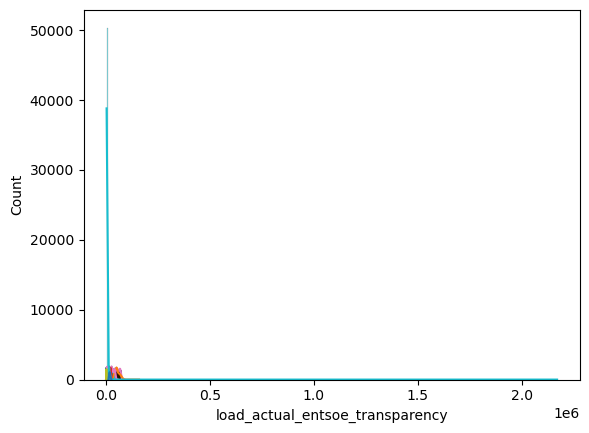

In [23]:
final_df.groupby('country').apply(lambda df: sns.histplot(df.load_actual_entsoe_transparency,kde=True))

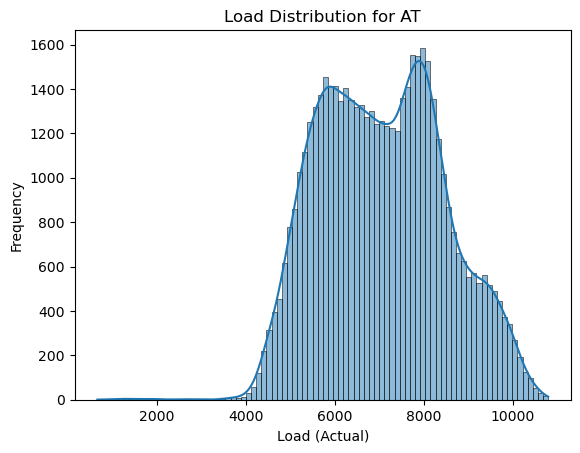

In [27]:
sns.histplot(final_df[final_df['country'] == 'AT']['load_actual_entsoe_transparency'], kde=True)
plt.title("Load Distribution for AT")
plt.xlabel("Load (Actual)")
plt.ylabel("Frequency")
plt.show()

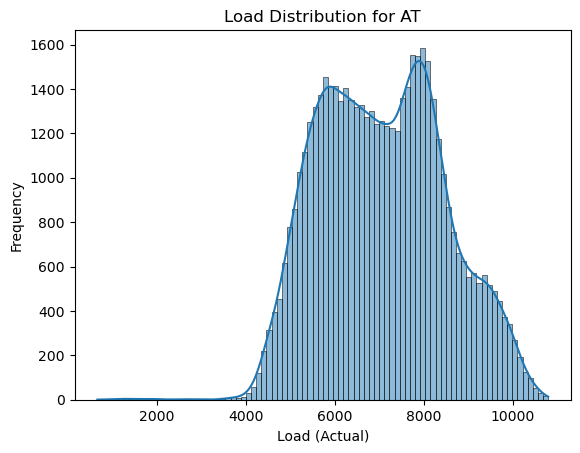

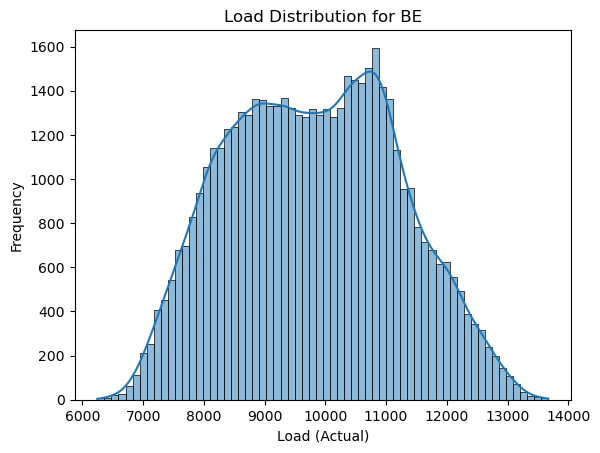

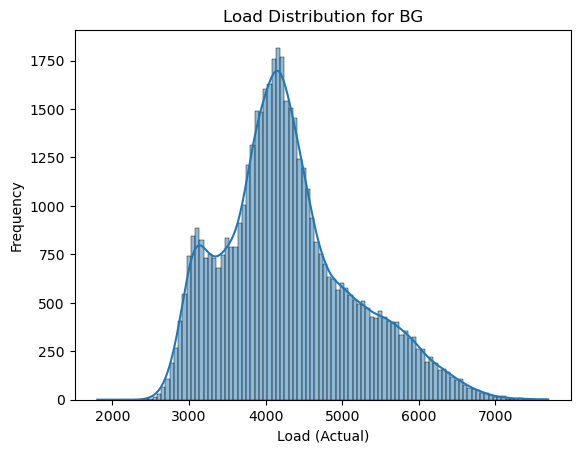

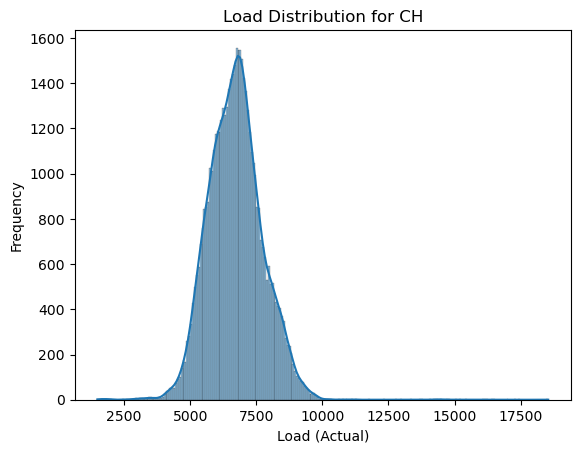

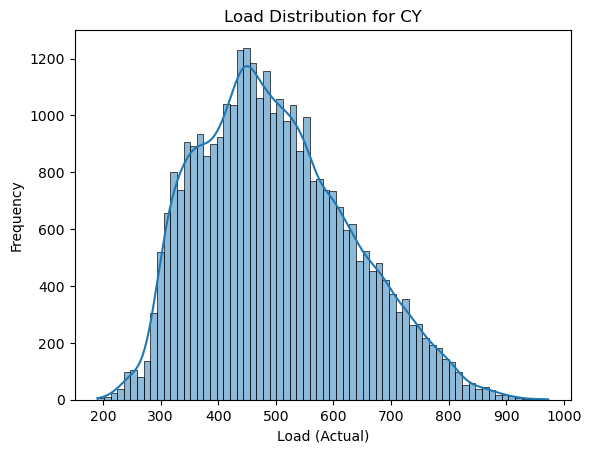

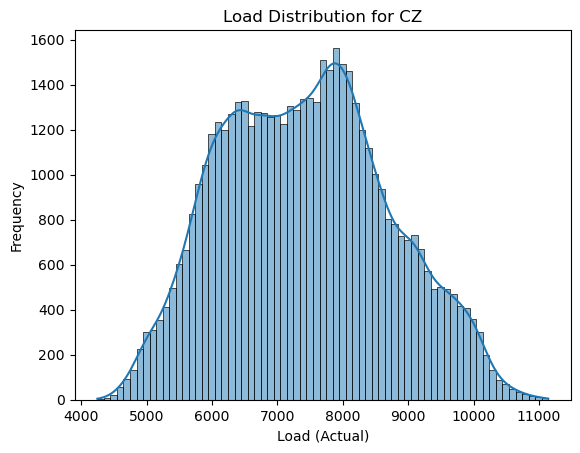

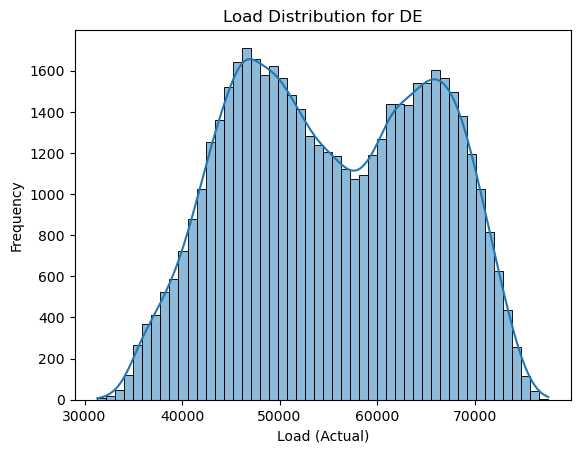

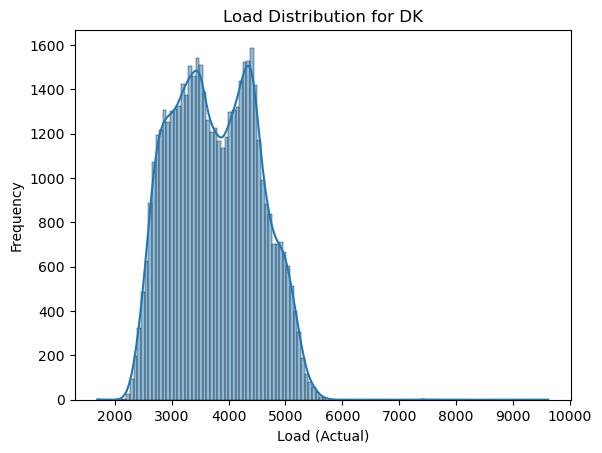

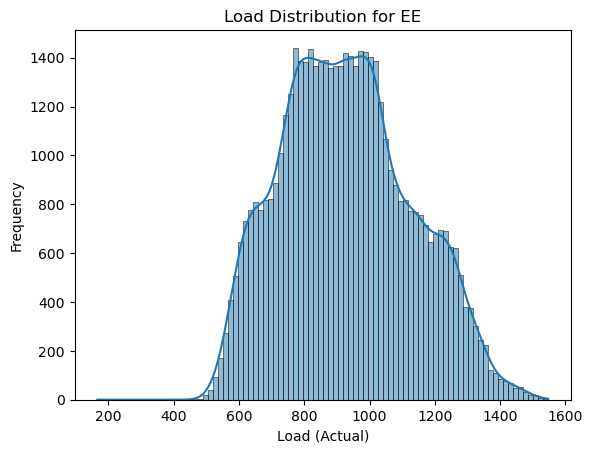

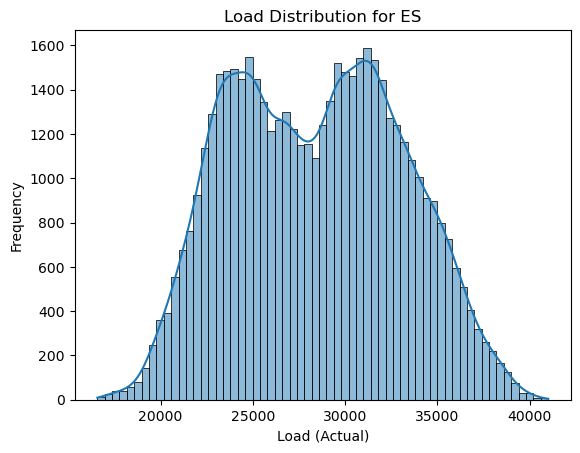

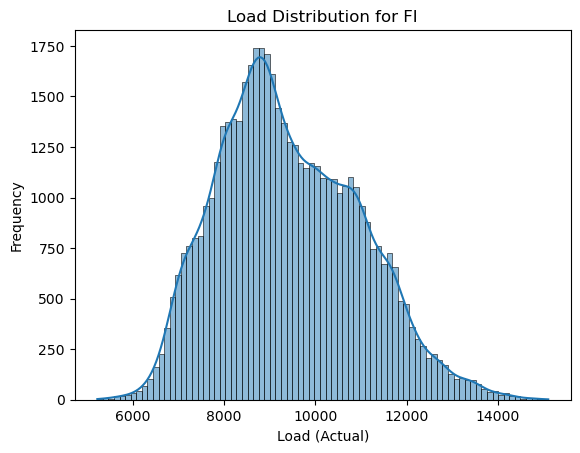

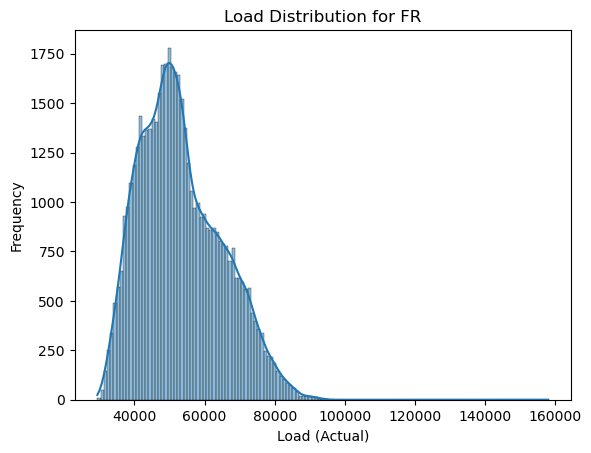

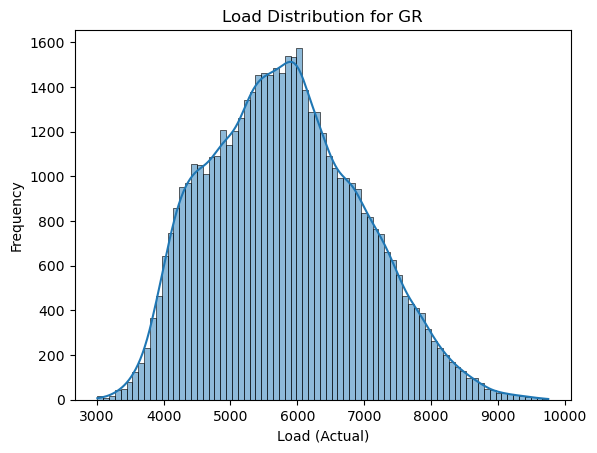

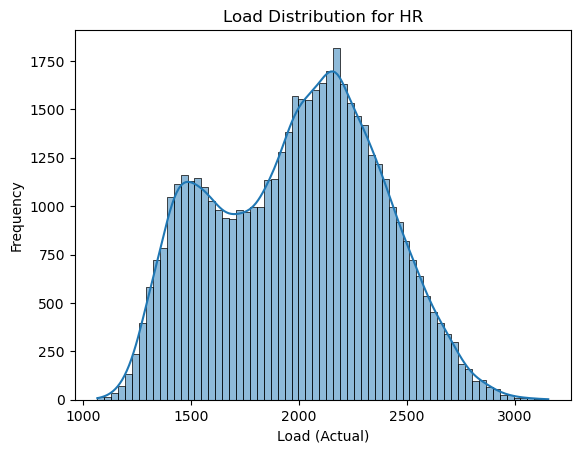

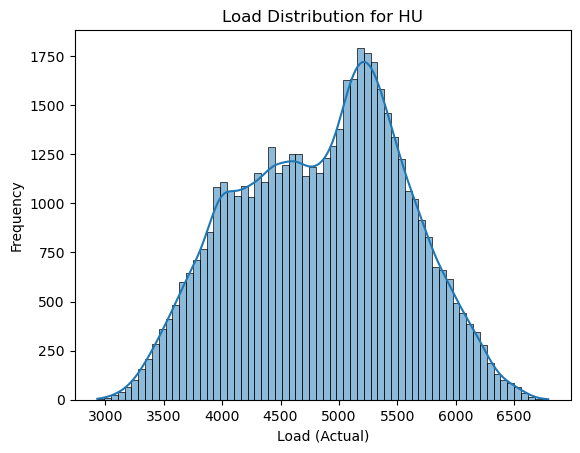

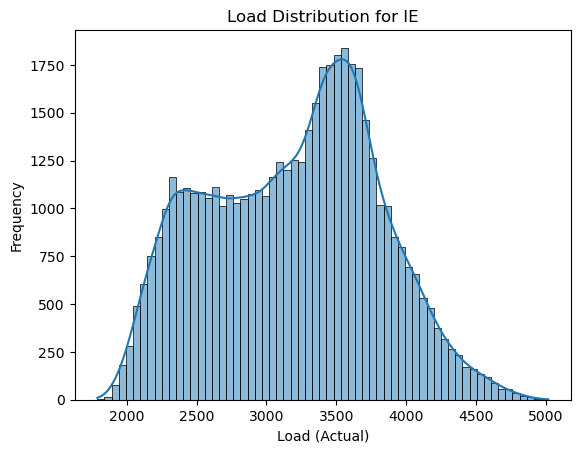

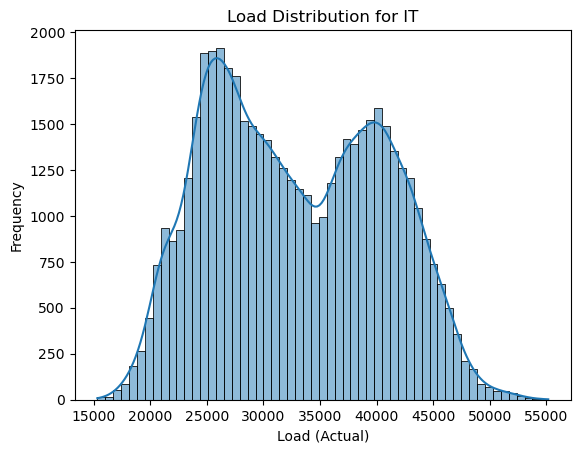

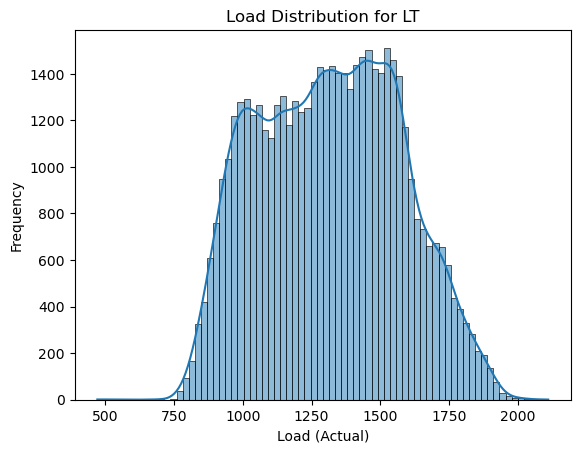

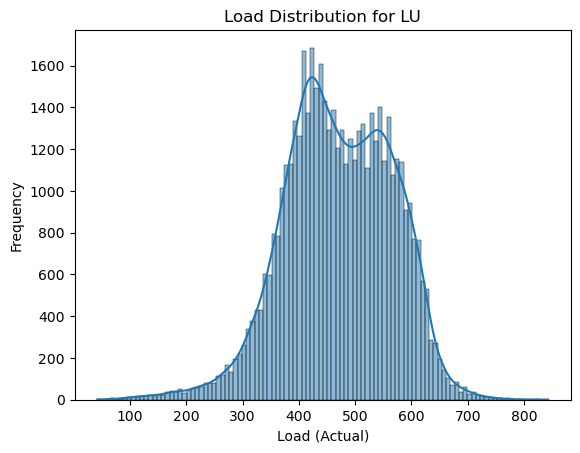

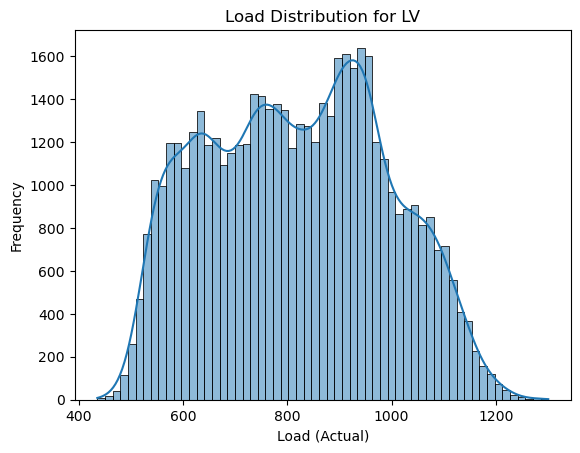

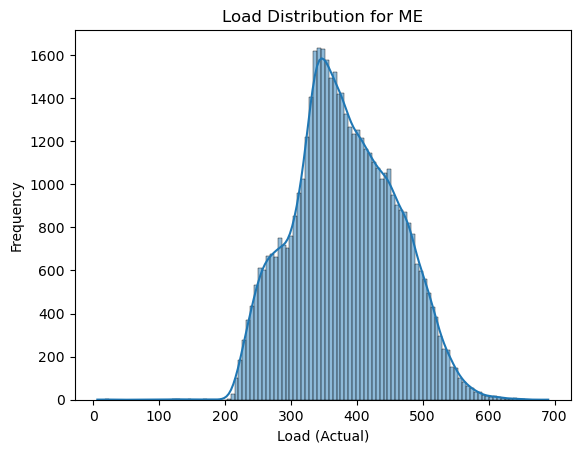

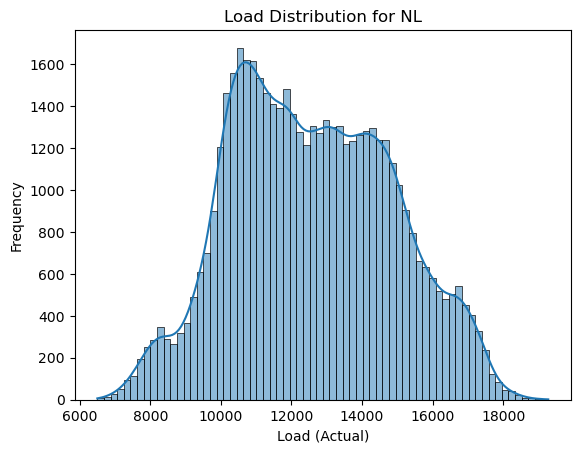

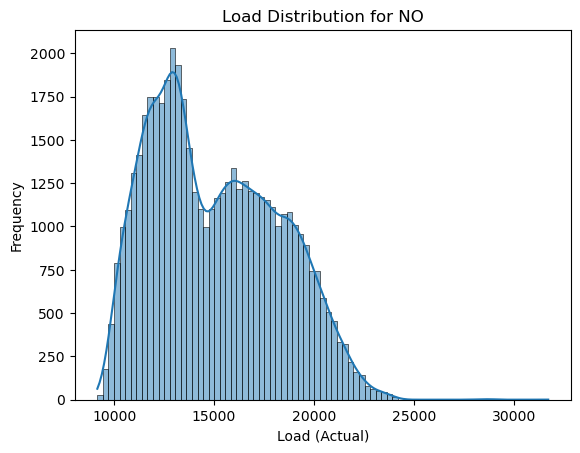

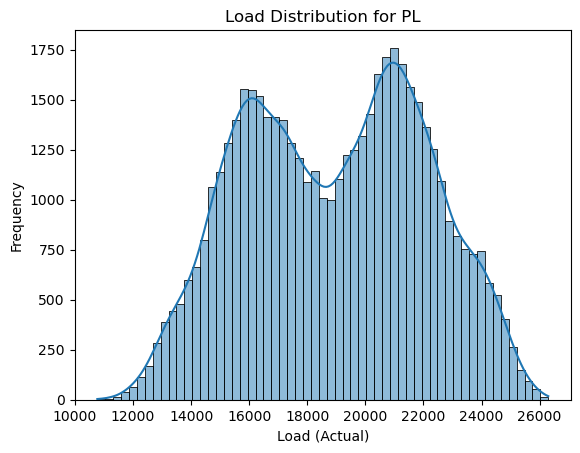

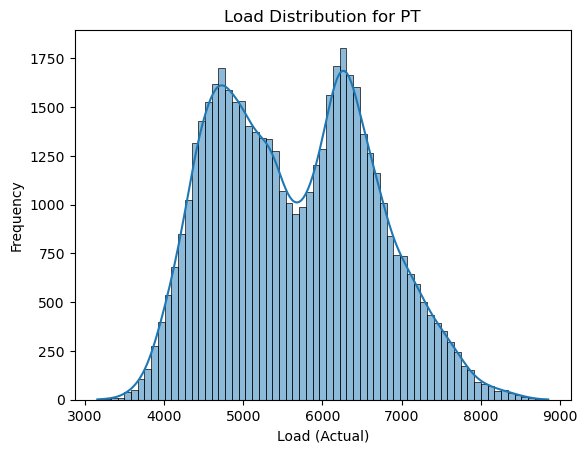

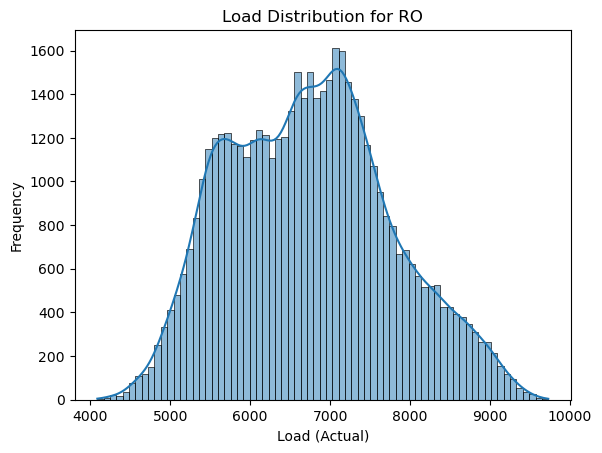

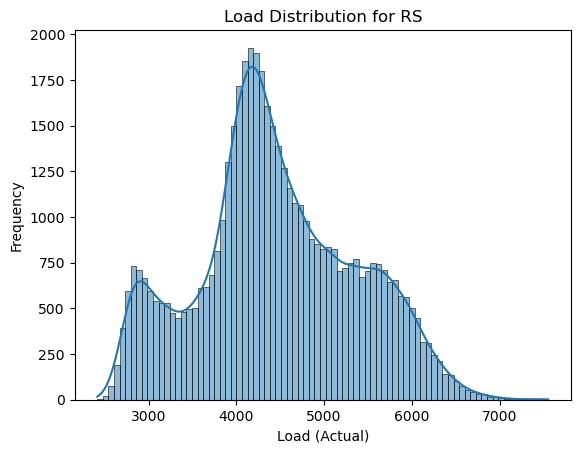

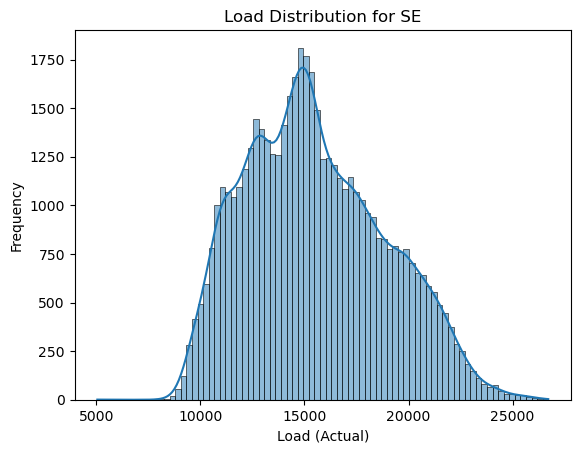

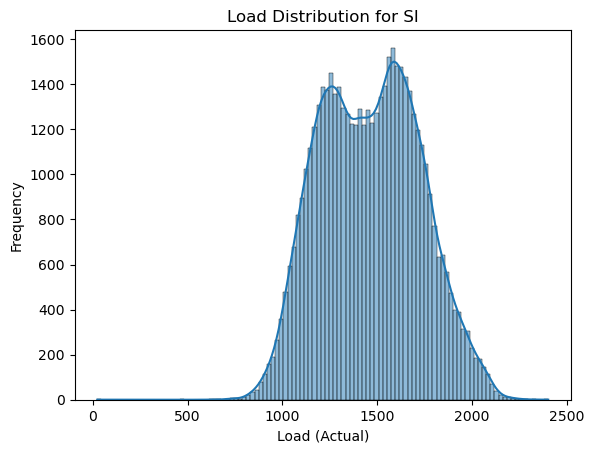

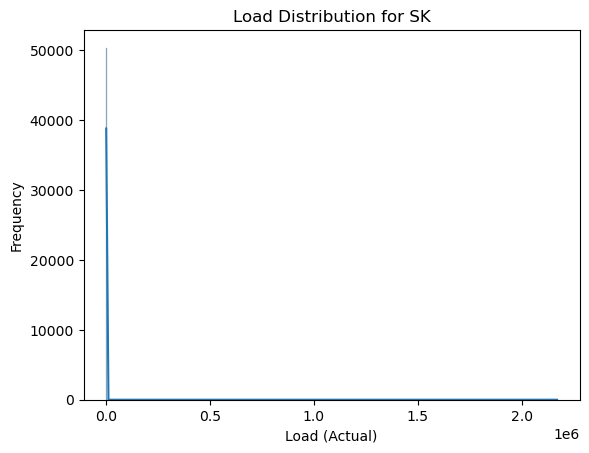

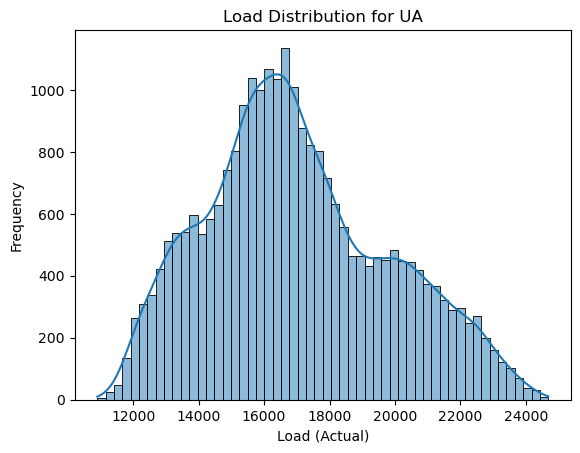

In [28]:
for country in final_df['country'].unique():
    plt.figure()  # new figure for each country
    sns.histplot(
        final_df[final_df['country'] == country]['load_actual_entsoe_transparency'],
        kde=True
    )
    plt.title(f"Load Distribution for {country}")
    plt.xlabel("Load (Actual)")
    plt.ylabel("Frequency")
    plt.show()